# Projeto de precificação do valor cobrado para entrega de esculturas

![](https://github.com/Mirlaa/regressao-arvores/blob/main/imagens-projeto/imagem-do-projeto-inicio.png?raw=true)

# Aula 1 - Trabalhando com os dados

In [1]:
url = 'link_github/entregas.csv'

url_teste = 'link-github/teste_entregas.csv'

In [3]:
import pandas as pd
import numpy as np

In [4]:
dados = pd.read_csv(url)
dados

,id_cliente,nome_artista,reputacao_artista,altura,largura,peso,material,preco_escultura,preco_base_envio,internacional,envio_expresso,instalacao_incluida,transporte,fragil,pedido_extra_cliente,localizacao_remota,data_agendada,data_entrega,custo
0,e9dff114-bc2b-47e9-9f5c-669e32ad9bbe,Billy Jenkins,0.26000,5.1816,1.8288,1872.427776,Latão,73027.5,85.4175,Sim,Sim,Não,Aéreo,Não,Sim,Não,07/06/19,03/06/19,1487.2725
1,ba3b707f-b123-4eec-93f4-1fbebfe72b68,Jean Bryant,0.28000,0.9144,0.9144,27.669112,Latão,35857.5,78.7500,Não,Não,Não,Rodoviário,Não,Sim,Não,06/03/21,05/03/21,839.7900
2,c4212086-3e22-489e-bc2e-0d5092ef0526,Laura Miller,0.07000,2.4384,1.5240,107.501304,Argila,26040.0,111.1950,Não,Não,Não,Rodoviário,Sim,Sim,Sim,09/03/19,08/03/19,810.0225
3,fec1bee9-44cf-498f-a849-5e5e2cab062b,Robert Chaires,0.12000,2.7432,2.4384,1407.042384,Alumínio,30502.5,85.6275,Não,Não,Não,Não especificado,Não,Não,Sim,24/05/19,20/05/19,846.0900
4,f9f2ed8c-7f56-4e69-a80e-cb01d0a711da,Rosalyn Krol,0.15000,5.1816,1.8288,146.963808,Alumínio,16695.0,62.6850,Sim,Sim,Sim,Aéreo,Não,Sim,Não,18/12/20,14/12/20,835.9575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,d692e37c-8047-468e-ba60-89b977158662,Phil Wilson,0.93000,6.0960,2.4384,294.381208,Alumínio,25462.5,130.0950,Sim,Não,Sim,Aquaviário,Não,Sim,Não,23/03/19,27/03/19,3923.9550
4458,2671f714-e85d-46c9-a53a-7bca8d61a2cb,Berry Simmons,0.67000,3.9624,2.4384,215.456200,Alumínio,19162.5,67.8825,Sim,Não,Sim,Rodoviário,Não,Sim,Não,28/10/22,27/10/22,1546.7550
4459,e1004685-9047-4f34-9103-57d900716936,William Curry,0.46185,3.9624,2.4384,69.853168,Madeira,27982.5,68.2500,Não,Sim,Não,Aéreo,Não,Não,Não,16/03/21,16/03/21,916.4925
4460,a380ff88-2c96-4d70-919a-af0bc8caeed7,Karen Bayles,0.45000,6.0960,8.5344,4921.926792,Alumínio,161857.5,355.4250,Não,Não,Sim,Rodoviário,Não,Sim,Não,19/04/20,21/04/20,5653.4625


Dicionário de dados:

| Nome da Coluna       | Descrição                                                      |
|----------------------|----------------------------------------------------------------|
| id_cliente        | Representa o número de identificação único dos clientes        |
| nome_artista      | Representa o nome do artista                                   |
| reputacao_artista | Representa a reputação de um artista no mercado (quanto maior o valor da reputação, maior a reputação do artista no mercado) |
| altura               | Representa a altura da escultura em metros                     |
| largura              | Representa a largura da escultura em metros                     |
| peso                 | Representa o peso da escultura em quilos                       |
| material             | Representa o material do qual a escultura é feita              |
| preco_escultura   | Representa o preço da escultura         |
| preco_base_envio  | Representa o preço base para o envio de uma escultura          |
| internacional        | Indica se o envio é internacional                              |
| envio_expresso       | Indica se o envio foi no modo expresso (rápido)    |
| instalacao_incluida  | Indica se a instalação estava incluída na compra da escultura  |
| transporte           | Representa o modo de transporte do pedido                      |
| fragil               | Indica se o pedido é frágil                                    |
| pedido_extra_cliente | Representa se o cliente deixou detalhes a mais para entrega     |
| data_agendada        | Representa a data de previsão de entrega        |
| data_entrega      | Representa a data de entrega do pedido          |
| custo                | Representa o custo do envio do pedido      |

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            4462 non-null   object 
 1   nome_artista          4462 non-null   object 
 2   reputacao_artista     4462 non-null   float64
 3   altura                4462 non-null   float64
 4   largura               4462 non-null   float64
 5   peso                  4462 non-null   float64
 6   material              4462 non-null   object 
 7   preco_escultura       4462 non-null   float64
 8   preco_base_envio      4462 non-null   float64
 9   internacional         4462 non-null   object 
 10  envio_expresso        4462 non-null   object 
 11  instalacao_incluida   4462 non-null   object 
 12  transporte            4462 non-null   object 
 13  fragil                4462 non-null   object 
 14  pedido_extra_cliente  4462 non-null   object 
 15  localizacao_remota   

**ENTENDENDO AS COLUNAS**

**Dado numérico:**
- `'reputacao_artista'`, `'altura'`, `'largura'`, `'peso'`, `'preco_escultura'`, `'preco_base_envio'`.

**Categóricas:**

- `'id_cliente'`, `'nome_artista'`, `'material'`, `'internacional'`, `'envio_expresso'`, `'instalacao_incluida'`, `'transporte'`, `'fragil'`, `'pedido_extra_cliente'`, `localizacao_remota`.

**Datas:**

- `'data_agendada'`, `'data_entrega'`.

**Alvo:**
- `'custo'`.

In [6]:
df = dados.copy()

In [7]:
df['data_agendada'] = pd.to_datetime(df['data_agendada'], format = '%d/%m/%y')
df['data_entrega'] = pd.to_datetime(df['data_entrega'], format='%d/%m/%y')

In [8]:
df['diferenca_dias_entrega'] = (df['data_entrega'] - df['data_agendada']).dt.days

In [9]:
df['data_agendada_dias'] = df['data_agendada'].dt.day
df['data_agendada_mes'] = df['data_agendada'].dt.month
df['data_agendada_ano'] = df['data_agendada'].dt.year

In [10]:
df['data_entrega_dias'] = df['data_entrega'].dt.day
df['data_entrega_mes'] = df['data_entrega'].dt.month
df['data_entrega_ano'] = df['data_entrega'].dt.year

In [11]:
df.drop(['data_agendada','data_entrega'], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              4462 non-null   object 
 1   nome_artista            4462 non-null   object 
 2   reputacao_artista       4462 non-null   float64
 3   altura                  4462 non-null   float64
 4   largura                 4462 non-null   float64
 5   peso                    4462 non-null   float64
 6   material                4462 non-null   object 
 7   preco_escultura         4462 non-null   float64
 8   preco_base_envio        4462 non-null   float64
 9   internacional           4462 non-null   object 
 10  envio_expresso          4462 non-null   object 
 11  instalacao_incluida     4462 non-null   object 
 12  transporte              4462 non-null   object 
 13  fragil                  4462 non-null   object 
 14  pedido_extra_cliente    4462 non-null   

In [13]:
colunas_categoricas = ['id_cliente', 'nome_artista', 'material', 'internacional', 'envio_expresso', 'instalacao_incluida',
                       'transporte', 'fragil', 'pedido_extra_cliente','localizacao_remota']

for column in colunas_categoricas:
    unique_values = df[column].unique()
    print(f"Valores únicos na coluna '{column}' \n {len(unique_values)} valores:")
    print(unique_values)
    print('=='*45)

Valores únicos na coluna 'id_cliente' 
 4462 valores:
['e9dff114-bc2b-47e9-9f5c-669e32ad9bbe'
 'ba3b707f-b123-4eec-93f4-1fbebfe72b68'
 'c4212086-3e22-489e-bc2e-0d5092ef0526' ...
 'e1004685-9047-4f34-9103-57d900716936'
 'a380ff88-2c96-4d70-919a-af0bc8caeed7'
 '26fea648-9cc1-4a2b-9458-0b2d35957803']
Valores únicos na coluna 'nome_artista' 
 4441 valores:
['Billy Jenkins' 'Jean Bryant' 'Laura Miller' ... 'William Curry'
 'Karen Bayles' 'Denise Worth']
Valores únicos na coluna 'material' 
 8 valores:
['Latão' 'Argila' 'Alumínio' 'Madeira' 'Bronze' 'Pedra' 'Não especificado'
 'Mármore']
Valores únicos na coluna 'internacional' 
 2 valores:
['Sim' 'Não']
Valores únicos na coluna 'envio_expresso' 
 2 valores:
['Sim' 'Não']
Valores únicos na coluna 'instalacao_incluida' 
 2 valores:
['Não' 'Sim']
Valores únicos na coluna 'transporte' 
 4 valores:
['Aéreo' 'Rodoviário' 'Não especificado' 'Aquaviário']
Valores únicos na coluna 'fragil' 
 2 valores:
['Não' 'Sim']
Valores únicos na coluna 'pedido_

**ENTENDENDO AS COLUNAS TEXTUAIS**

**Categóricas:**

- *Valores binários*: `'internacional'`, `'envio_expresso'`, `'instalacao_incluida'`,  `'fragil'`, `'pedido_extra_cliente'`, `'localizacao_remota'`.
- *Várias Categorias*:`'material'`, `'transporte'`
- *Valores únicos*: `'id_cliente'`, `'nome_artista'`

In [14]:
categoricas = ['internacional', 'envio_expresso', 'instalacao_incluida', 'fragil', 'pedido_extra_cliente', 'localizacao_remota', 'material', 'transporte']

df = pd.get_dummies(df, columns = categoricas,
                    prefix = categoricas,
                    drop_first=True)

In [15]:
df.drop(['id_cliente', 'nome_artista'], axis = 1, inplace = True)

In [16]:
df

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,custo,diferenca_dias_entrega,data_agendada_dias,data_agendada_mes,...,material_Argila,material_Bronze,material_Latão,material_Madeira,material_Mármore,material_Não especificado,material_Pedra,transporte_Aéreo,transporte_Não especificado,transporte_Rodoviário
0,0.26000,5.1816,1.8288,1872.427776,73027.5,85.4175,1487.2725,-4,7,6,...,False,False,True,False,False,False,False,True,False,False
1,0.28000,0.9144,0.9144,27.669112,35857.5,78.7500,839.7900,-1,6,3,...,False,False,True,False,False,False,False,False,False,True
2,0.07000,2.4384,1.5240,107.501304,26040.0,111.1950,810.0225,-1,9,3,...,True,False,False,False,False,False,False,False,False,True
3,0.12000,2.7432,2.4384,1407.042384,30502.5,85.6275,846.0900,-4,24,5,...,False,False,False,False,False,False,False,False,True,False
4,0.15000,5.1816,1.8288,146.963808,16695.0,62.6850,835.9575,-4,18,12,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,0.93000,6.0960,2.4384,294.381208,25462.5,130.0950,3923.9550,4,23,3,...,False,False,False,False,False,False,False,False,False,False
4458,0.67000,3.9624,2.4384,215.456200,19162.5,67.8825,1546.7550,-1,28,10,...,False,False,False,False,False,False,False,False,False,True
4459,0.46185,3.9624,2.4384,69.853168,27982.5,68.2500,916.4925,0,16,3,...,False,False,False,True,False,False,False,True,False,False
4460,0.45000,6.0960,8.5344,4921.926792,161857.5,355.4250,5653.4625,2,19,4,...,False,False,False,False,False,False,False,False,False,True


# Aula 2 - Construindo Árvore de Regressão

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('custo',axis = 1)
y = df['custo']

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size = 0.2, random_state=45)

In [18]:
len(X_teste),len(X_treino)

(893, 3569)

In [19]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=45)
dtr.fit(X_treino,y_treino)

DecisionTreeRegressor(random_state=45)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Métricas conjunto de treino:')
print('R²:', r2_score(y_treino, dtr.predict(X_treino)))
print('MAE:', mean_absolute_error(y_treino, dtr.predict(X_treino)))
print('RMSE:', mean_squared_error(y_treino, dtr.predict(X_treino), squared = False))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_teste, dtr.predict(X_teste)))
print('MAE:', mean_absolute_error(y_teste, dtr.predict(X_teste)))
print('RMSE:', mean_squared_error(y_teste, dtr.predict(X_teste), squared = False))

Métricas conjunto de treino:
R²: 1.0
MAE: 0.0
RMSE: 0.0


Métricas conjunto de teste:
R²: 0.660591437323694
MAE: 694.1638773796193
RMSE: 1544.651772523526


In [21]:
print(f"Número de nós: {dtr.tree_.node_count}")
print(f"Número de folhas: {dtr.tree_.n_leaves}")
print(f"Profundidade máxima: {dtr.tree_.max_depth}")

Número de nós: 7135
Número de folhas: 3568
Profundidade máxima: 30


In [22]:
dtr.feature_names_in_

array(['reputacao_artista', 'altura', 'largura', 'peso',
       'preco_escultura', 'preco_base_envio', 'diferenca_dias_entrega',
       'data_agendada_dias', 'data_agendada_mes', 'data_agendada_ano',
       'data_entrega_dias', 'data_entrega_mes', 'data_entrega_ano',
       'internacional_Sim', 'envio_expresso_Sim',
       'instalacao_incluida_Sim', 'fragil_Sim',
       'pedido_extra_cliente_Sim', 'localizacao_remota_Sim',
       'material_Argila', 'material_Bronze', 'material_Latão',
       'material_Madeira', 'material_Mármore',
       'material_Não especificado', 'material_Pedra', 'transporte_Aéreo',
       'transporte_Não especificado', 'transporte_Rodoviário'],
      dtype=object)

In [23]:
dtr.feature_importances_

array([2.95578488e-01, 4.29089881e-02, 3.78042354e-02, 2.21994392e-02,
       3.84947343e-01, 1.49395147e-01, 1.22586707e-02, 1.11972117e-02,
       2.86561159e-03, 1.99295839e-03, 1.14020224e-02, 3.54964474e-03,
       1.57834550e-03, 6.77238263e-04, 5.94807112e-03, 2.79459433e-03,
       4.12356992e-03, 9.82178117e-04, 9.73419750e-04, 6.98369997e-04,
       2.13022242e-04, 7.89364354e-04, 1.61255529e-04, 1.65835374e-04,
       7.69720325e-04, 1.19398420e-05, 2.27767179e-03, 1.43086476e-03,
       3.04778449e-04])

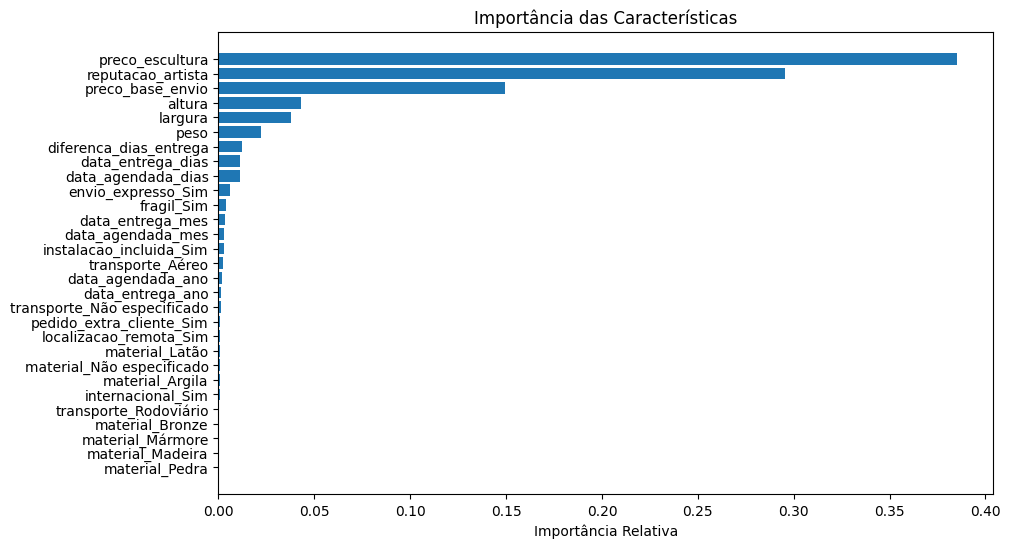

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

features_importancias = pd.DataFrame({'Feature': dtr.feature_names_in_,
                                      'Importância': dtr.feature_importances_}).sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(features_importancias['Feature'], features_importancias['Importância'])
plt.xlabel('Importância Relativa')
plt.title('Importância das Características')

plt.show()

# Aula 3 - Evitando o overfitting com a otimização

![](https://github.com/Mirlaa/regressao-arvores/blob/main/imagens-projeto/imagem--2.png?raw=true)

In [25]:
param_grid = {
    'max_depth': [6, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10, 15],
    'max_leaf_nodes': [None, 100, 500]
}

In [26]:
from sklearn.model_selection import GridSearchCV

grid_search_dtr = GridSearchCV(dtr, param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_search_dtr.fit(X_treino,y_treino)

dtr_otimizado = grid_search_dtr.best_estimator_

print('Melhores parâmetros:', grid_search_dtr.best_params_)

Melhores parâmetros: {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [27]:
print('Métricas conjunto de treino:')
print('R²:', r2_score(y_treino, dtr_otimizado.predict(X_treino)))
print('MAE:', mean_absolute_error(y_treino, dtr_otimizado.predict(X_treino)))
print('RMSE:', mean_squared_error(y_treino, dtr_otimizado.predict(X_treino), squared = False))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_teste, dtr_otimizado.predict(X_teste)))
print('MAE:', mean_absolute_error(y_teste, dtr_otimizado.predict(X_teste)))
print('RMSE:', mean_squared_error(y_teste, dtr_otimizado.predict(X_teste), squared = False))

Métricas conjunto de treino:
R²: 0.8709496124958277
MAE: 473.70848177515785
RMSE: 980.4175958553703


Métricas conjunto de teste:
R²: 0.7539366877133971
MAE: 586.9786990247475
RMSE: 1315.2024908853869


**VAMOS COMPARAR**

![](https://github.com/Mirlaa/regressao-arvores/blob/main/imagens-projeto/imagem-3.png?raw=true)

In [28]:
from sklearn.model_selection import cross_validate, KFold

cv_estrategia = KFold(n_splits=3, shuffle=True, random_state=45)

resultados = cross_validate(dtr_otimizado,X,y,scoring='neg_mean_squared_error', cv= cv_estrategia,
                            return_train_score=True)

In [29]:
treino_rmse = np.sqrt(-resultados['train_score'])
teste_rmse = np.sqrt(-resultados['test_score'])

print("Treino RMSE em cada fold:", treino_rmse)
print("Teste RMSE em cada fold:", teste_rmse)
print("\nMédia do RMSE no treino:", treino_rmse.mean())
print("Média do RMSE no teste:", teste_rmse.mean())

Treino RMSE em cada fold: [1061.33787095  985.34242721 1023.82861998]
Teste RMSE em cada fold: [1359.22040707 1469.19123426 1424.79371964]

Média do RMSE no treino: 1023.5029727125925
Média do RMSE no teste: 1417.7351203213384


# Aula 4 - Implementando uma Floresta Aleatória

In [30]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor (n_estimators=100, random_state=45, oob_score=True)
rfr.fit(X_treino,y_treino)

RandomForestRegressor(oob_score=True, random_state=45)

In [31]:
print('Métricas conjunto de treino:')
print('R²:', r2_score(y_treino, rfr.predict(X_treino)))
print('MAE:', mean_absolute_error(y_treino, rfr.predict(X_treino)))
print('RMSE:', mean_squared_error(y_treino, rfr.predict(X_treino), squared = False))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_teste, rfr.predict(X_teste)))
print('MAE:', mean_absolute_error(y_teste, rfr.predict(X_teste)))
print('RMSE:', mean_squared_error(y_teste, rfr.predict(X_teste), squared = False))

print('\n\nPrevisão OOB R²:',rfr.oob_score_)

Métricas conjunto de treino:
R²: 0.9772974668010325
MAE: 183.67128603950695
RMSE: 411.21467064130854


Métricas conjunto de teste:
R²: 0.8253561789085245
MAE: 459.512885106383
RMSE: 1108.015414498702


Previsão OOB R²: 0.8283734967539083


**VAMOS COMPARAR**

![](https://github.com/Mirlaa/regressao-arvores/blob/main/imagens-projeto/imagem-4.png?raw=true)

In [32]:
cv_estrategia = KFold(n_splits=3, shuffle=True, random_state=45)

resultados = cross_validate(rfr,X,y,scoring='neg_mean_squared_error', cv= cv_estrategia,
                            return_train_score=True)

treino_rmse = np.sqrt(-resultados['train_score'])
teste_rmse = np.sqrt(-resultados['test_score'])

print("Média do RMSE no treino:", treino_rmse.mean())
print("Média do RMSE no teste:", teste_rmse.mean())

Média do RMSE no treino: 426.80944484310663
Média do RMSE no teste: 1148.5596272436603


# Aula 5 - Buscando a otimização da Floresta Aleatória

In [33]:
param_grid = {
    'max_depth': [None, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5],
    'max_leaf_nodes':  [400, 550]
}

In [34]:
rf = RandomForestRegressor(random_state=45)

grid_search_rfr = GridSearchCV(rf, param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_search_rfr.fit(X_treino,y_treino)

rfr_otimizado = grid_search_rfr.best_estimator_

print('Melhores parâmetros:', grid_search_rfr.best_params_)

Melhores parâmetros: {'max_depth': None, 'max_leaf_nodes': 550, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [35]:
print('Métricas conjunto de treino:')
print('R²:', r2_score(y_treino, rfr_otimizado.predict(X_treino)))
print('MAE:', mean_absolute_error(y_treino, rfr_otimizado.predict(X_treino)))
print('RMSE:', mean_squared_error(y_treino, rfr_otimizado.predict(X_treino), squared = False))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_teste, rfr_otimizado.predict(X_teste)))
print('MAE:', mean_absolute_error(y_teste, rfr_otimizado.predict(X_teste)))
print('RMSE:', mean_squared_error(y_teste, rfr_otimizado.predict(X_teste), squared = False))

Métricas conjunto de treino:
R²: 0.966372224892234
MAE: 223.1127138044924
RMSE: 500.4728329544333


Métricas conjunto de teste:
R²: 0.8259394800792159
MAE: 455.37640843101957
RMSE: 1106.1635103057595


**VAMOS COMPARAR**

![](https://github.com/Mirlaa/regressao-arvores/blob/main/imagens-projeto/imagem-5.png?raw=true)

In [36]:
cv_estrategia = KFold(n_splits=3, shuffle=True, random_state=45)

resultados = cross_validate(rfr_otimizado,X,y,scoring='neg_mean_squared_error', cv= cv_estrategia,
                            return_train_score=True)

treino_rmse = np.sqrt(-resultados['train_score'])
teste_rmse = np.sqrt(-resultados['test_score'])

print("Média do RMSE no treino:", treino_rmse.mean())
print("Média do RMSE no teste:", teste_rmse.mean())

Média do RMSE no treino: 527.5049963671235
Média do RMSE no teste: 1143.5396130830359


In [51]:
novos_dados = pd.read_csv(url_teste)

custos = rfr_otimizado.predict(novos_dados)

novos_dados['custo'] = custos
novos_dados

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,diferenca_dias_entrega,data_agendada_dias,data_agendada_mes,data_agendada_ano,...,material_Bronze,material_Latão,material_Madeira,material_Mármore,material_Não especificado,material_Pedra,transporte_Aéreo,transporte_Não especificado,transporte_Rodoviário,custo
0,0.67,2.1336,1.2192,48.987936,36.3300,73.2900,0,2,5,2020,...,False,False,False,False,False,False,False,False,True,1160.319118
1,0.61,1.8288,1.5240,43.998424,22.2075,71.5050,2,4,1,2022,...,False,False,False,False,False,False,True,False,False,1117.674567
2,0.14,4.5720,2.4384,343.369144,32.9700,124.8975,3,14,9,2021,...,False,False,False,False,False,False,False,False,True,1009.792168
3,0.63,3.0480,1.2192,758.859416,23.0475,93.6075,-1,3,12,2021,...,False,False,False,True,False,False,False,False,True,1557.430411
4,0.34,9.7536,1.8288,505.755080,34.9125,119.7000,4,3,2,2022,...,False,False,False,False,False,False,True,False,False,1440.866779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,0.00,2.1336,1.5240,736.179816,22.6275,113.1375,-3,14,11,2021,...,False,False,False,True,False,False,True,False,False,963.489644
1430,0.10,3.6576,1.8288,390.996304,27.7725,80.6400,0,9,12,2019,...,True,False,False,False,False,False,False,False,True,726.439325
1431,0.20,1.2192,1.2192,9.071840,31.0800,105.5250,4,6,3,2022,...,False,False,False,False,False,False,False,False,True,849.624140
1432,0.22,9.7536,2.4384,488.972176,27.7725,112.8225,-3,21,2,2023,...,False,False,False,False,False,False,False,False,False,1077.269370


In [52]:
novos_dados.to_csv('Precos_entregas.csv',index=False)